In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same',input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2))

In [3]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPool2D(2))

In [4]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

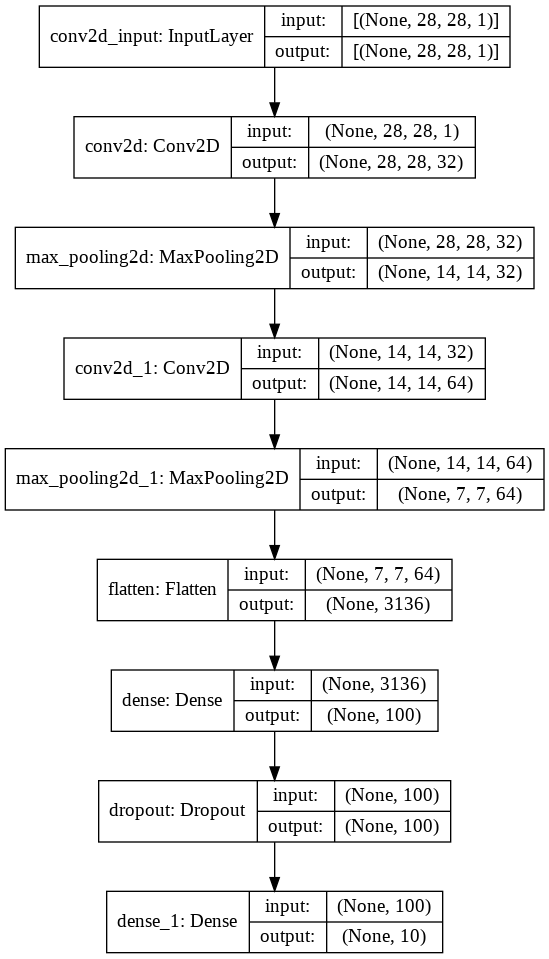

In [6]:
keras.utils.plot_model(model, show_shapes=True)

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 36s 3ms/step - loss: 0.5248 - accuracy: 0.8125 - val_loss: 0.3395 - val_accuracy: 0.8766
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3437 - accuracy: 0.8775 - val_loss: 0.2754 - val_accuracy: 0.8989
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2934 - accuracy: 0.8960 - val_loss: 0.2885 - val_accuracy: 0.8914
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2627 - accuracy: 0.9049 - val_loss: 0.2413 - val_accuracy: 0.9097
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2361 - accuracy: 0.9138 - val_loss: 0.2271 - val_accuracy: 0.9152
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2186 - accuracy: 0.9182 - val_loss: 0.2225 - val_accuracy: 0.9195
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2036 - accuracy: 0.9254 - val_loss: 0.2255 - val_accuracy

In [8]:
import matplotlib.pyplot as plt

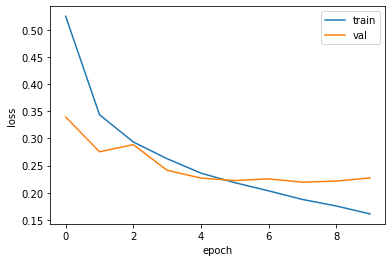

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [10]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2195 - accuracy: 0.9217


[0.2194872498512268, 0.92166668176651]

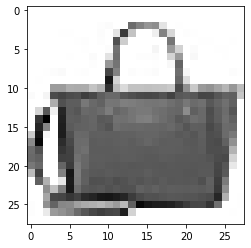

In [11]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [12]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[1.2530111e-19 1.5205924e-26 4.9566360e-22 3.4124959e-22 7.0415260e-21
  1.3017381e-19 3.3108041e-19 1.2332369e-19 1.0000000e+00 2.9390916e-18]]


In [13]:
test_scaled= test_input.reshape(-1,28,28,1) /255.0
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2494 - accuracy: 0.9141


[0.2494451105594635, 0.9140999913215637]